## Import and install

In [ ]:
!pip install geopandas -q 
!pip install pycountry -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import missingno as msno
import seaborn as sns
from matplotlib.pyplot import figure 

### Import Dataset

In [ ]:
drinks_df = pd.read_csv("https://github.com/AriannaConverti97/visualizzazione_scientifica_project/raw/main/drinks.csv")
drinks_last_year= pd.read_csv("https://raw.githubusercontent.com/YaKsenia/world_alcohol_consumption_analysis_python/master/data_world_alcohol_consumption.csv")

### Rappresentazione trend ultimi anni nel mondo

In [ ]:
del drinks_last_year["Unnamed: 0"]
del drinks_last_year["Data Source_x"]

In [ ]:
drinks_last_year

,Country,Beverage Types,2016,2015,2014,2013,2012,2011,2010,2009,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,Afghanistan,All types,NaN,0.02,0.03,0.03,0.04,0.04,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,Afghanistan,Beer,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,Afghanistan,Wine,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
3,Afghanistan,Spirits,NaN,0.02,0.02,0.02,0.03,0.03,0.02,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
4,Afghanistan,Other alcoholic beverages,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,Zimbabwe,Beer,NaN,2.23,2.12,2.05,2.07,2.05,1.67,1.09,...,0.55,0.54,0.54,0.54,0.22,0.21,0.25,0.24,0.25,NaN
981,Zimbabwe,Wine,NaN,0.05,0.05,0.13,0.09,0.13,0.10,0.08,...,0.00,0.00,0.00,0.01,0.04,0.04,0.05,0.02,0.04,NaN
982,Zimbabwe,Spirits,NaN,0.43,0.43,0.32,0.44,0.32,0.34,0.36,...,1.32,1.37,1.41,1.45,0.75,0.38,0.39,0.40,0.41,NaN
983,Zimbabwe,Other alcoholic beverages,NaN,0.85,0.85,0.83,0.85,0.83,0.81,0.94,...,3.20,4.13,3.53,4.04,3.86,3.92,3.94,4.39,3.53,NaN


In [ ]:
display(drinks_last_year.describe())

,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
count,463.000000,881.000000,888.000000,966.000000,974.000000,979.000000,979.000000,984.000000,984.000000,984.000000,...,666.000000,666.000000,666.000000,666.000000,661.000000,661.000000,661.000000,632.000000,619.000000,8.000000
mean,2.340475,2.043212,2.056532,2.002267,2.034086,2.031634,2.032676,1.953039,2.022104,2.013526,...,2.064850,2.030526,1.996381,1.984084,1.919652,1.890545,1.851936,1.761377,1.718368,4.186250
std,2.836573,2.719585,2.735864,2.729443,2.771711,2.749606,2.744071,2.710773,2.823484,2.836864,...,3.222407,3.237457,3.166222,3.180025,3.134592,3.107826,3.082822,3.004754,2.962447,2.874136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000
25%,0.160000,0.080000,0.087500,0.080000,0.060000,0.060000,0.065000,0.050000,0.040000,0.060000,...,0.062500,0.060000,0.052500,0.052500,0.050000,0.040000,0.050000,0.040000,0.040000,2.457500
50%,1.290000,0.840000,0.830000,0.790000,0.785000,0.820000,0.810000,0.695000,0.710000,0.720000,...,0.760000,0.710000,0.670000,0.640000,0.600000,0.590000,0.580000,0.510000,0.490000,3.505000
75%,3.440000,3.130000,3.192500,3.017500,3.170000,3.125000,3.110000,2.907500,2.912500,2.950000,...,2.530000,2.417500,2.400000,2.410000,2.330000,2.420000,2.280000,2.122500,2.140000,5.482500
max,15.350000,16.640000,17.290000,17.750000,16.960000,16.270000,14.970000,14.320000,16.380000,17.370000,...,22.150000,22.480000,23.050000,23.320000,23.370000,23.960000,24.630000,24.600000,26.040000,8.910000


In [ ]:
missing_value_last_year = drinks_last_year.isna().sum()/len(drinks_last_year)*100
display(missing_value_last_year.index, missing_value_last_year.values)

Index(['Country', 'Beverage Types', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985',
       '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976',
       '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967',
       '1966', '1965', '1964', '1963', '1962', '1961', '1960'],
      dtype='object')

array([ 0.        ,  0.        , 52.99492386, 10.55837563,  9.84771574,
        1.92893401,  1.11675127,  0.60913706,  0.60913706,  0.10152284,
        0.10152284,  0.10152284,  0.20304569,  1.21827411,  1.62436548,
        1.21827411,  1.11675127,  1.11675127,  1.11675127,  5.38071066,
        9.34010152,  9.23857868,  9.23857868,  9.13705584,  9.13705584,
        9.13705584,  9.94923858, 11.77664975, 12.18274112, 21.4213198 ,
       20.91370558, 21.31979695, 21.82741117, 22.03045685, 22.53807107,
       22.63959391, 22.84263959, 23.35025381, 23.85786802, 31.97969543,
       32.3857868 , 31.97969543, 32.3857868 , 31.57360406, 31.57360406,
       31.57360406, 32.08121827, 31.97969543, 31.97969543, 32.3857868 ,
       32.3857868 , 32.3857868 , 32.3857868 , 32.89340102, 32.89340102,
       32.89340102, 35.83756345, 37.15736041, 99.18781726])

In [ ]:
for i in missing_value_last_year[missing_value_last_year>50].index:
  del drinks_last_year[i]

In [ ]:
drinks_last_year=drinks_last_year[drinks_last_year['Beverage Types']=='All types']

In [ ]:
drinks_last_year.head()

,Country,Beverage Types,2015,2014,2013,2012,2011,2010,2009,2008,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
0,Afghanistan,All types,0.02,0.03,0.03,0.04,0.04,0.03,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Albania,All types,4.77,4.81,5.06,5.43,5.65,5.53,6.04,5.82,...,1.77,1.73,1.44,1.17,1.03,1.04,1.04,0.91,1.17,NaN
10,Algeria,All types,0.56,0.56,0.54,0.49,0.44,0.39,0.48,0.43,...,1.67,1.87,1.32,0.88,0.85,0.93,0.91,1.12,1.77,2.57
15,Andorra,All types,9.97,9.95,9.78,10.06,10.31,10.64,10.80,10.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Angola,All types,5.65,9.00,8.02,8.14,7.86,7.67,6.89,6.90,...,5.43,5.51,5.39,5.25,5.76,5.31,4.92,4.70,4.49,5.37


In [ ]:
from sklearn.impute import KNNImputer

def knn_imputer(df:pd.DataFrame, neighbours:int=5)->pd.DataFrame:
    return pd.DataFrame(
        KNNImputer(n_neighbors=neighbours).fit_transform(df.values),
        columns=df.columns,
        index=df.index
)

In [ ]:
new_last_year= drinks_last_year.copy()
#new_last_year.iloc[:, 2:-1] = knn_imputer(drinks_last_year.iloc[:, 2:-1])
#col_impu = knn_imputer(drinks_last_year.iloc[:, 2:-1])
#col_impu
#for col in new_last_year.columns:
  
a=[1,2,3,4]
b=[5,6,7]
list(a)+list(b)
prova= knn_imputer(new_last_year.iloc[:,2:])
prova.index
#new_last_year.isna().sum().sum()

Int64Index([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,
            ...
            934, 939, 944, 949, 954, 959, 964, 969, 974, 979],
           dtype='int64', length=197)

In [ ]:
#prova.insert(0, "Total", prova.sum(axis=1, numeric_only=True), True)
prova.insert(0, 'country', new_last_year['Country'])
prova 

,country,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
0,Afghanistan,0.02,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.03,...,0.000,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000
5,Albania,4.77,4.81,5.06,5.43,5.65,5.53,6.04,5.82,5.76,...,1.770,1.73,1.44,1.170,1.030,1.04,1.04,0.910,1.170,1.062
10,Algeria,0.56,0.56,0.54,0.49,0.44,0.39,0.48,0.43,0.39,...,1.670,1.87,1.32,0.880,0.850,0.93,0.91,1.120,1.770,2.570
15,Andorra,9.97,9.95,9.78,10.06,10.31,10.64,10.80,10.97,11.53,...,8.978,8.30,7.93,7.644,7.582,7.71,7.78,7.294,8.248,7.044
20,Angola,5.65,9.00,8.02,8.14,7.86,7.67,6.89,6.90,6.22,...,5.430,5.51,5.39,5.250,5.760,5.31,4.92,4.700,4.490,5.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Venezuela (Bolivarian Republic of),5.98,6.41,6.66,6.65,6.70,7.18,7.56,8.15,8.69,...,6.590,5.90,6.09,5.960,5.960,5.76,5.38,4.930,4.920,4.930
964,Viet Nam,2.92,2.74,2.66,2.50,2.37,2.18,1.91,1.73,1.52,...,0.850,0.85,0.82,0.860,0.800,0.81,0.76,0.730,0.710,0.670
969,Yemen,0.04,0.04,0.04,0.04,0.04,0.05,0.03,0.04,0.05,...,0.510,0.52,0.53,0.560,0.600,0.62,0.65,0.670,0.690,0.700
974,Zambia,2.89,2.93,2.81,2.96,2.93,2.95,2.50,2.31,2.78,...,8.090,8.25,8.54,9.080,8.860,8.46,8.12,8.180,8.320,8.460


In [ ]:
leaders= prova.sort_values(by=['2015'], ascending=False).head(5)
leaders

,country,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
285,Estonia,16.64,17.29,17.75,16.96,16.27,14.97,14.32,16.38,17.37,...,7.60,7.51,7.332,6.906,6.586,6.586,6.264,6.362,5.782,5.710
494,Lithuania,14.42,14.82,15.14,15.15,14.88,13.61,12.40,13.30,13.40,...,7.60,7.51,7.332,6.906,6.586,6.586,6.264,6.362,6.312,6.242
225,Czechia,12.82,13.06,12.84,12.97,12.61,12.65,13.31,13.35,13.35,...,11.90,11.42,10.610,10.640,10.490,10.180,9.360,9.060,9.120,9.000
330,Germany,11.99,11.60,11.67,11.76,11.87,11.35,11.61,11.75,11.89,...,15.53,14.98,14.040,13.510,13.590,14.000,13.710,12.850,12.050,11.030
310,France,11.87,11.97,11.64,12.24,12.37,12.33,12.30,12.30,12.60,...,21.77,22.15,22.480,23.050,23.320,23.370,23.960,24.630,24.600,26.040


In [ ]:
prova[prova['country']=='Italy']['2015']/ prova[prova['country']=='Italy']['2015'].sum()*10

419    10.0
Name: 2015, dtype: float64

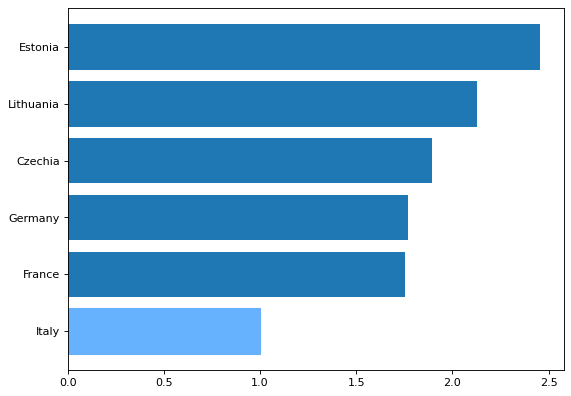

In [ ]:
figure(figsize=(8,6), dpi=80,)
b= leaders[['country', '2015']]
x = list(b['country']) + ['Italy']
y = list(b ['2015']/b['2015'].sum()*10) + list([1.0])
c = pd.DataFrame({'country' : x,'2015' : y})
#print(c)
#print(type(y))
c=c.sort_values('2015')
z= plt.barh(c['country'], c['2015'])
z[0].set_color('#66b2ff')
plt.show()

In [ ]:
list(leaders['country'])+ ['Italy']

['Estonia', 'Lithuania', 'Czechia', 'Germany', 'France', 'Italy']

In [ ]:
l= prova.melt(id_vars=[ 'country'],
                         var_name="Year",
                         value_name="Value")
l

,country,Year,Value
0,Afghanistan,2015,0.02
1,Albania,2015,4.77
2,Algeria,2015,0.56
3,Andorra,2015,9.97
4,Angola,2015,5.65
...,...,...,...
10830,Venezuela (Bolivarian Republic of),1961,4.93
10831,Viet Nam,1961,0.67
10832,Yemen,1961,0.70
10833,Zambia,1961,8.46


In [ ]:
l.Year= l.Year.astype('int')
type(l['Year'][0])

numpy.int64

In [ ]:
overview = drinks_last_year.copy()
overview = overview.melt(id_vars=[ 'Country', 'Beverage Types'],
                         var_name="Year",
                         value_name="Value")
overview= overview[overview['Beverage Types']=='All types']

In [ ]:
overview.Year= overview.Year.astype('int')

In [ ]:
type(overview['Year'][0])

numpy.int64

In [ ]:
overview

,Country,Beverage Types,Year,Value
0,Afghanistan,All types,2015,0.02
1,Albania,All types,2015,4.77
2,Algeria,All types,2015,0.56
3,Andorra,All types,2015,9.97
4,Angola,All types,2015,5.65
...,...,...,...,...
10830,Venezuela (Bolivarian Republic of),All types,1961,4.93
10831,Viet Nam,All types,1961,0.67
10832,Yemen,All types,1961,0.70
10833,Zambia,All types,1961,8.46


In [ ]:
countries_distribution = overview.groupby(by=['Year']).mean().reset_index()

285      Estonia
494    Lithuania
225      Czechia
330      Germany
310       France
Name: country, dtype: object
Czechia #099CFF
Estonia #005492
France #00A2E8
Germany #66B2FF
Italy r
Lithuania #0072C6


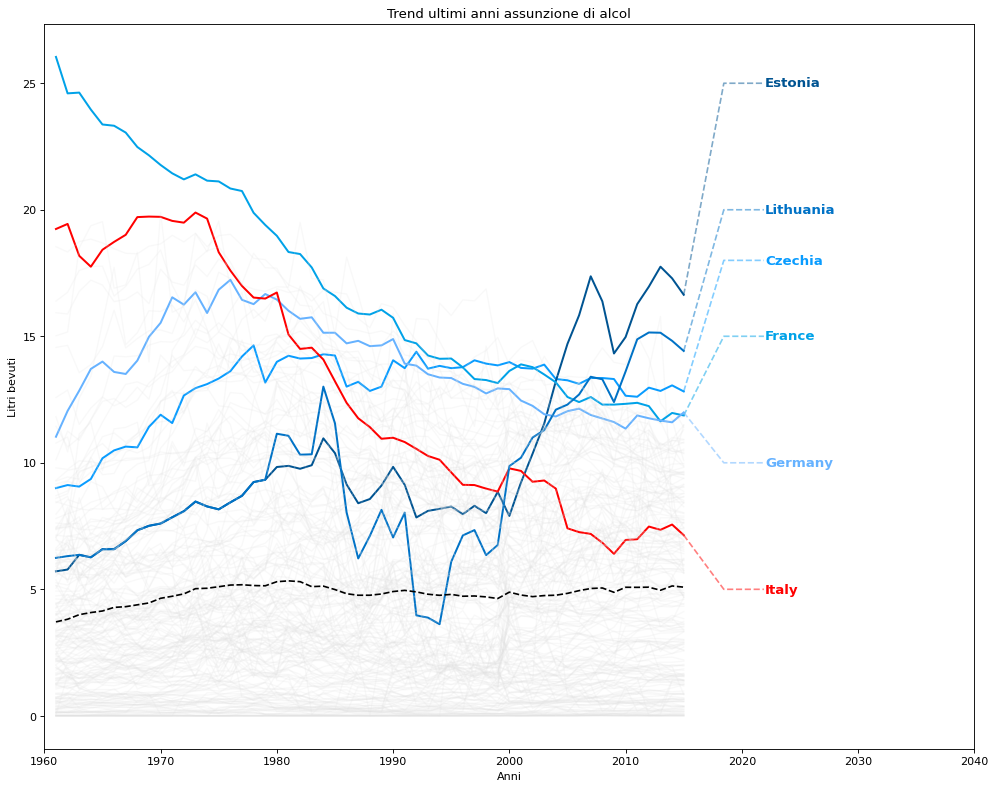

In [ ]:

figure(figsize=(15,12), dpi=80)
LABEL_Y = [
   18,  # ARG
    25,  # BRA
    15,    # CHE
    10,   # DNK
    5,  # EUZ
    20,   # GBR
]
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    #GREY50     # USA
]
BLUE_SCALE=[
    "#099CFF",#CHZ
    "#005492", #EST
    "#00A2E8",# FRN
    "#66B2FF", #GERM
    "r", # ITALY
    "#0072C6", # LIT
     
] 
x_start = 2015
x_end = 2022
PAD = 0.1
count=0
print(leaders['country'])
for i in l['country'].unique():
  k= l[l['country']==i]
  g=k.groupby(by=['Year']).mean().reset_index()
  if i in leaders['country'].values or i =='Italy':
    
    
    if i=='Italy':
      color='r'
    else:
      color=BLUE_SCALE[count]
    print(i, str(color))
    plt.plot(g["Year"], g["Value"], label=i, lw=1.8, color=color)
    y_start= g['Value'].values[-1]
    y_end= LABEL_Y[count]

    plt.plot([x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], alpha=0.5, ls='dashed', color= color)

    plt.text(
        x_end, 
        y_end, 
        i, 
        color= color,
        fontsize=12, 
        weight="bold", 
        #fontfamily="Montserrat", 
        va="center"
    )
    count =count+1
  else:
    plt.plot(g['Year'], g['Value'], color='#E0E0E0', lw= 1.2, alpha=0.2)
  
plt.plot(countries_distribution["Year"], countries_distribution["Value"] , color='black', linestyle="dashed")
plt.title('Trend ultimi anni assunzione di alcol' )

plt.xlabel('Anni')
plt.ylabel('Litri bevuti')
plt.xlim(1960, 2040)
#plt.legend()
plt.show()

In [ ]:
val_max= countries_distribution[countries_distribution['Value']==countries_distribution['Value'].max()]['Year'].values[0]

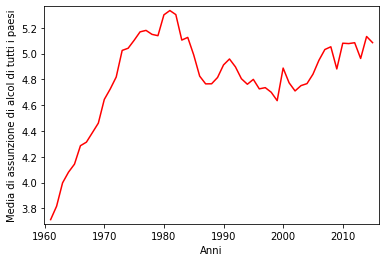

In [ ]:
plt.plot(countries_distribution["Year"],countries_distribution["Value"] , color='r')
plt.margins(0.02)
#plt.axvline(x = val_max, color = 'b', label = 'axvline - full height')
plt.xlabel('Anni')
plt.ylabel('Media di assunzione di alcol di tutti i paesi')
plt.show()

In [ ]:
highlights= list(leaders['country'].values)+ ['Italy']
highlights 

['Estonia', 'Lithuania', 'Czechia', 'Germany', 'France', 'Italy']

In [ ]:
df_prova.melt()

,variable,value
0,country,Namibia
1,country,Czech Republic
2,country,Gabon
3,country,Germany
4,country,Lithuania
5,2022,0.55476
6,2022,0.947145
7,2022,0.720374
8,2022,0.915393
9,2022,0.942149




---



### GeoMap sulla situazione del 2022

In [ ]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append(None)
    return CODE

In [ ]:
drinks_df['CODE']=alpha3code(drinks_df.country)
drinks_df.head()
drinks_df['CODE'].isna().sum()

drinks_df[drinks_df['CODE'].isna()].country, drinks_df[drinks_df['CODE'].isna()].index

(5                 Antigua & Barbuda
 20                          Bolivia
 21               Bosnia-Herzegovina
 24                           Brunei
 28                    Cote d'Ivoire
 45                   Czech Republic
 46                      North Korea
 47                         DR Congo
 79                             Iran
 92                             Laos
 110                      Micronesia
 138                     South Korea
 139                         Moldova
 143               St. Kitts & Nevis
 144                       St. Lucia
 145    St. Vincent & the Grenadines
 148             Sao Tome & Principe
 164                       Swaziland
 167                           Syria
 170                       Macedonia
 174               Trinidad & Tobago
 183                        Tanzania
 184                             USA
 188                       Venezuela
 189                         Vietnam
 Name: country, dtype: object,
 Int64Index([  5,  20,  21,  24,  28,  45,  

In [ ]:
new_drinks_df= drinks_df
new_drinks_df.loc[5,'CODE']='ATG'
new_drinks_df.loc[20,'CODE']='BOL'
new_drinks_df.loc[21,'CODE']='BIH'
new_drinks_df.loc[24,'CODE']='BRN'
new_drinks_df.loc[28,'CODE']='CIV'
new_drinks_df.loc[45,'CODE']='CZE'
new_drinks_df.loc[46,'CODE']='PRK'
new_drinks_df.loc[47,'CODE']='COD'
new_drinks_df.loc[79,'CODE']='IRN'
new_drinks_df.loc[92,'CODE']='LAO'
new_drinks_df.loc[110,'CODE']='FSM'
new_drinks_df.loc[138,'CODE']='KOR'
new_drinks_df.loc[139,'CODE']='MDA'
new_drinks_df.loc[143,'CODE']='KNA'
new_drinks_df.loc[144,'CODE']='LCA'
new_drinks_df.loc[145,'CODE']='VCT'

new_drinks_df.loc[148,'CODE']='STP'
new_drinks_df.loc[164,'CODE']='SWZ'
new_drinks_df.loc[167,'CODE']='SYR'
new_drinks_df.loc[170,'CODE']='MKD'
new_drinks_df.loc[174,'CODE']='TTO'
new_drinks_df.loc[183,'CODE']='TZA'
new_drinks_df.loc[184,'CODE']='USA'
new_drinks_df.loc[188,'CODE']='VEN'
new_drinks_df.loc[189,'CODE']='VNM'

new_drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,CODE
0,Afghanistan,0,0,0,0.0,AFG
1,Albania,89,132,54,4.9,ALB
2,Algeria,25,0,14,0.7,DZA
3,Andorra,245,138,312,12.4,AND
4,Angola,217,57,45,5.9,AGO
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,VEN
189,Vietnam,111,2,1,2.0,VNM
190,Yemen,6,0,0,0.1,YEM
191,Zambia,32,19,4,2.5,ZMB


In [ ]:
assert(new_drinks_df.isna().sum().sum()==0)

In [ ]:
display(new_drinks_df.describe())

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
for col in new_drinks_df.columns:
  #print(new_drinks_df[col])
  if type(new_drinks_df[col][0]) != str:
    new_drinks_df[col] = (new_drinks_df[col]- new_drinks_df[col].min(axis=0)) / (new_drinks_df[col].max(axis=0) - new_drinks_df[col].min(axis=0))

In [ ]:
new_drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,CODE
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,AFG
1,Albania,0.236702,0.301370,0.145946,0.340278,ALB
2,Algeria,0.066489,0.000000,0.037838,0.048611,DZA
3,Andorra,0.651596,0.315068,0.843243,0.861111,AND
4,Angola,0.577128,0.130137,0.121622,0.409722,AGO
...,...,...,...,...,...,...
188,Venezuela,0.885638,0.228311,0.008108,0.534722,VEN
189,Vietnam,0.295213,0.004566,0.002703,0.138889,VNM
190,Yemen,0.015957,0.000000,0.000000,0.006944,YEM
191,Zambia,0.085106,0.043379,0.010811,0.173611,ZMB


In [ ]:
import geopandas
world_filepath = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(world_filepath)
k=world.merge(new_drinks_df, right_on="CODE", left_on="iso_a3", how='left')
assert(len(k[k['geometry'].isna()])==0)

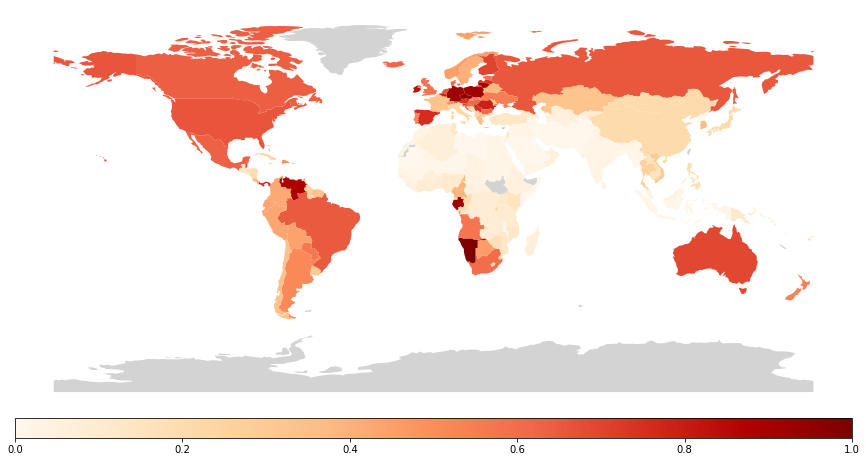

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
k.plot(column="beer_servings", ax=ax, missing_kwds={"color": "lightgrey"}, legend=True, cax=cax, legend_kwds={
    'orientation': "horizontal"}, cmap='OrRd'
    )
ax.set_axis_off();
fig.show()

            country  beer_servings
117         Namibia       1.000000
45   Czech Republic       0.960106
62            Gabon       0.922872
65          Germany       0.920213
98        Lithuania       0.912234


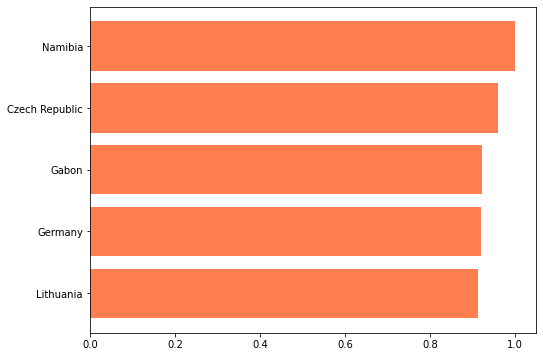

In [ ]:
df_country = new_drinks_df.sort_values(by='beer_servings', ascending=False)
df_prova= df_country.iloc[:, [0,1]].head(5)
print(df_prova)
df_sorted= df_prova.sort_values('beer_servings')

figure(figsize=(8,6))
bars = plt.barh( df_sorted.country, df_sorted.beer_servings, color='#FF7F50')
plt.show()

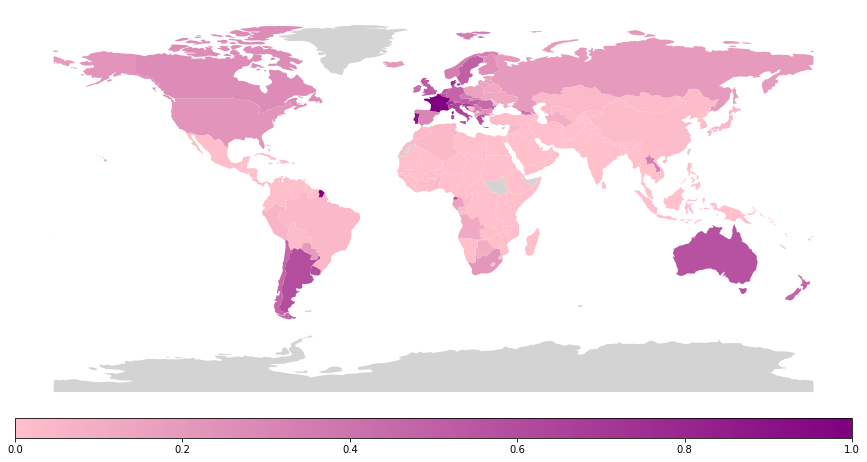

In [ ]:
import matplotlib.colors 
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["pink","purple"])

fig, ax = plt.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
k.plot(column="wine_servings", ax=ax, missing_kwds={"color": "lightgrey"}, legend=True, cax=cax, legend_kwds={
    'orientation': "horizontal"}, cmap=cmap
    )
ax.set_axis_off();
fig.show()

In [ ]:
# Attenzione controllare come vengono gestite le colonie !!  Le colonie vengono aggregate al paese (Guyana == Francia)
drinks_df.sort_values("wine_servings", ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,CODE
61,France,0.337766,0.344749,1.000000,0.819444,FRA
136,Portugal,0.515957,0.152968,0.916216,0.763889,PRT
3,Andorra,0.651596,0.315068,0.843243,0.861111,AND
166,Switzerland,0.492021,0.228311,0.756757,0.708333,CHE
48,Denmark,0.595745,0.184932,0.751351,0.722222,DNK
156,Slovenia,0.718085,0.116438,0.745946,0.736111,SVN
99,Luxembourg,0.627660,0.303653,0.732432,0.791667,LUX
42,Croatia,0.611702,0.198630,0.686486,0.708333,HRV
83,Italy,0.226064,0.095890,0.640541,0.451389,ITA
55,Equatorial Guinea,0.244681,0.000000,0.629730,0.402778,GNQ


         country  wine_servings
61        France       1.000000
136     Portugal       0.916216
3        Andorra       0.843243
166  Switzerland       0.756757
48       Denmark       0.751351


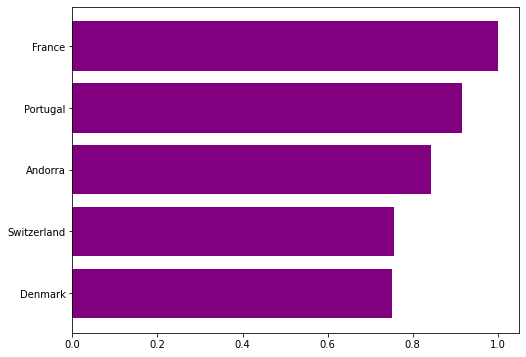

In [ ]:
df_country = new_drinks_df.sort_values(by='wine_servings', ascending=False)
df_prova= df_country.iloc[:, [0,3]].head(5)
print(df_prova)
df_sorted= df_prova.sort_values('wine_servings')

figure(figsize=(8,6))
bars = plt.barh( df_sorted.country, df_sorted.wine_servings, color='purple')
plt.show()

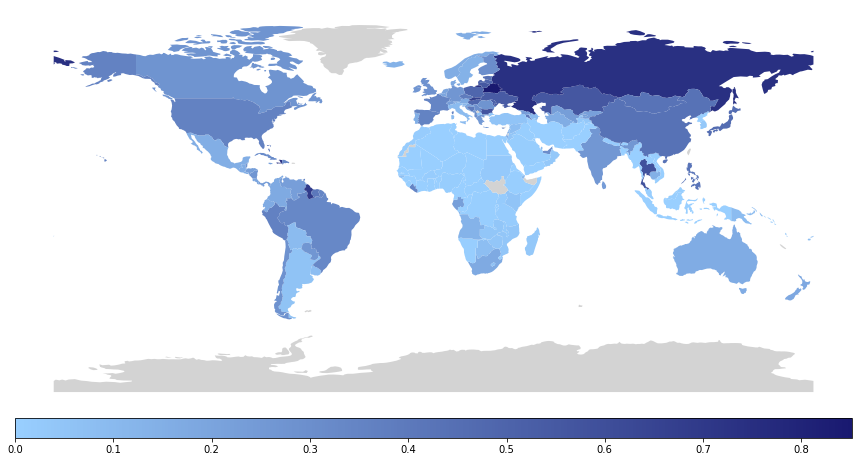

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#99cfff","#191970"])

fig, ax = plt.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
k.plot(column="spirit_servings", ax=ax, missing_kwds={"color": "lightgrey"}, legend=True, cax=cax, legend_kwds={
    'orientation': "horizontal"}, cmap=cmap
    )
ax.set_axis_off();
fig.show()

In [ ]:
drinks_df.sort_values("spirit_servings", ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,CODE
68,Grenada,0.529255,1.000000,0.075676,0.826389,GRD
15,Belarus,0.377660,0.851598,0.113514,1.000000,BLR
73,Haiti,0.002660,0.744292,0.002703,0.409722,HTI
141,Russian Federation,0.656915,0.744292,0.197297,0.798611,RUS
144,St. Lucia,0.454787,0.719178,0.191892,0.701389,LCA
72,Guyana,0.247340,0.689498,0.002703,0.493056,GUY
155,Slovakia,0.521277,0.668950,0.313514,0.791667,SVK
50,Dominica,0.138298,0.652968,0.070270,0.458333,DMA
169,Thailand,0.263298,0.589041,0.002703,0.444444,THA
40,Cook Islands,0.000000,0.579909,0.200000,0.409722,COK


                country  spirit_servings
68              Grenada         1.000000
15              Belarus         0.851598
73                Haiti         0.744292
141  Russian Federation         0.744292
144           St. Lucia         0.719178


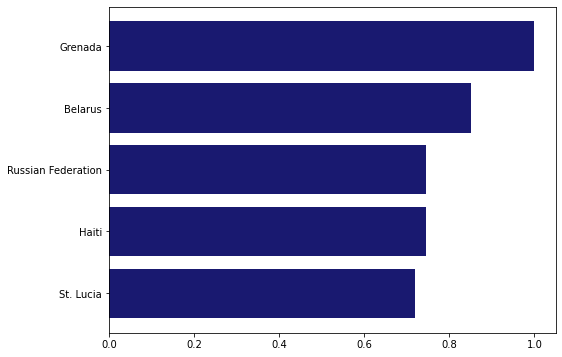

In [ ]:
df_country = new_drinks_df.sort_values(by='spirit_servings', ascending=False)
df_prova= df_country.iloc[:, [0,2]].head(5)
print(df_prova)
df_sorted= df_prova.sort_values('spirit_servings')

figure(figsize=(8,6))
bars = plt.barh( df_sorted.country, df_sorted.spirit_servings, color='#191970')

plt.show()

In [ ]:
new_drinks_df.insert(1, '2022', new_drinks_df.sum(axis=1, numeric_only=True))

In [ ]:
c= new_drinks_df[['country', '2022']]
value_2022= []
for i in highlights:
  value_2022.append(c[c['country']==i])

In [ ]:
k = c.sort_values(by='2022', ascending=False).head()
k

,country,2022
3,Andorra,2.671019
45,Czech Republic,2.529841
98,Lithuania,2.516496
61,France,2.501959
99,Luxembourg,2.455412


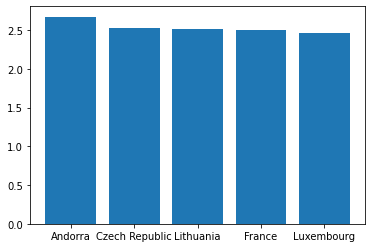

In [ ]:
plt.bar(k['country'], k['2022'])
plt.show()

In [ ]:
for i in c['country'] :
  if 'republic' in i.lower():
    print(i)

Central African Republic
Czech Republic
Dominican Republic


In [ ]:
highlights.remove('Czechia')

In [ ]:
highlights.remove('France')

In [ ]:
highlights + ['Czech Republic']

['Estonia', 'Lithuania', 'Germany', 'Italy', 'Czech Republic']

In [ ]:
val=[]
for i in highlights:
  val.append(c[c['country']== i]['2022'].values[0]) 

In [ ]:
situazione = pd.DataFrame(list(zip(highlights, val)), columns =['country', '2022'])

In [ ]:
aiuto = situazione.sort_values('2022', ascending=False)

<BarContainer object of 4 artists>

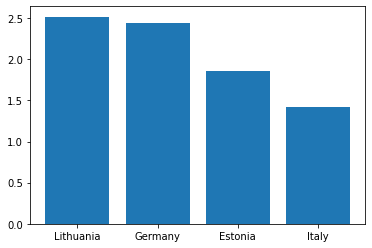

In [ ]:
plt.bar(aiuto['country'], aiuto['2022'])

In [ ]:
result= pd.concat([situazione, k], axis=0, ignore_index=True)

In [ ]:
result

,country,2022
0,Estonia,1.857849
1,Lithuania,2.516496
2,Germany,2.445031
3,Italy,1.413884
4,Andorra,2.671019
5,Czech Republic,2.529841
6,Lithuania,2.516496
7,France,2.501959
8,Luxembourg,2.455412


In [ ]:
r_ord= result.sort_values('2022', ascending=True)

COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    #GREY50     # USA
]

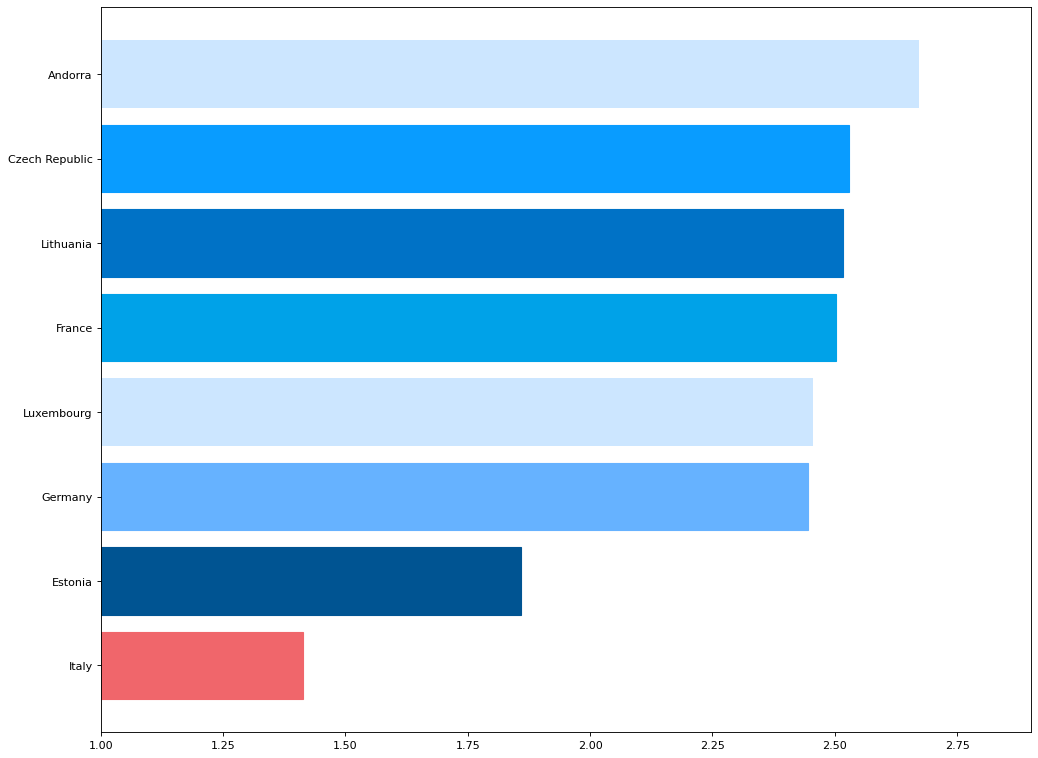

In [ ]:
figure(figsize=(15,12), dpi=80,)
graph = plt.barh(r_ord['country'], r_ord['2022'], color='#cce6ff')
  #  "#099CFF",#CHZ
  #  "#005492", #EST
  #  "#00A2E8",# FRN
  #  "#66B2FF", #GERM
  #  "r", # ITALY
  #  "#0072C6", # LIT
graph[0].set_color('#F0666B')
graph[1].set_color('#005492')
graph[2].set_color('#66B2FF')
graph[4].set_color('#00A2E8')
#graph[5].set_color('#')
graph[6].set_color('#0072C6')
graph[7].set_color('#099CFF')
plt.xlim(1.0, 2.9)
plt.show()

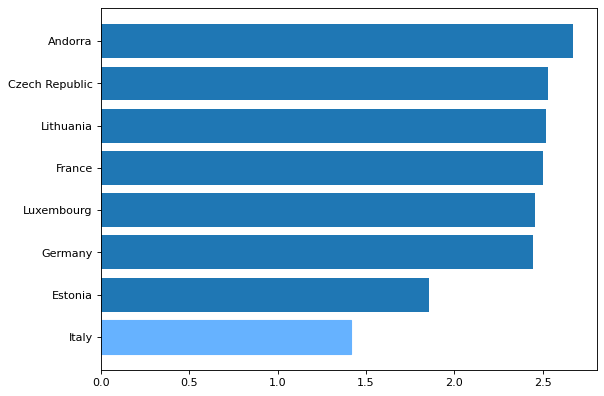

In [ ]:
figure(figsize=(8,6), dpi=80,)
cbar = plt.barh(r_ord['country'], r_ord['2022'])
cbar[0].set_color('#66b2ff')
plt.show()

In [ ]:
a= l[l['country']=='Andorra']
tot=a['Value'].sum()
